# Project Stage I - Task 3 Part A
- Calculate data trends for last week for The USA State of North Carolina
### Francis Perez - Team 2

## Load Needed Imports

In [1]:
import pandas as pd
import numpy as np

## Load Data

In [2]:
#read the covid confirmed cases file.
confirmed_org = pd.read_csv("..\..\..\data\covid_confirmed_usafacts.csv")

#read the covid deaths file.
deaths_org = pd.read_csv("..\..\..\data\covid_deaths_usafacts.csv")

### Clean Super File

In [3]:
#filter data download North carolina only
confirmed = confirmed_org[confirmed_org.apply(lambda x:(x["State"] == "NC"), axis=1)]
deaths = deaths_org[deaths_org.apply(lambda x:(x["State"] == "NC"), axis=1)]
confirmed.shape

(101, 269)

### Data Trends For confirmed Cases

In [4]:
#Get the last weeek (7days) of data for each data
confirmed_last7 = confirmed[confirmed.columns[-7:]].sum(axis=0)
deaths_last7 = deaths[deaths.columns[-7:]].sum(axis=0)

#The the last 8 days back total for each dataset
total_confirm_total_for_8_day = confirmed[confirmed.columns[-8:]].sum(axis=0)[0]
total_death_total_for_8_day = deaths[deaths.columns[-8:]].sum(axis=0)[0]

### Process calculation for each dataset

In [5]:
#create a copy of the confirm_last7
copy_confirmed = confirmed_last7.copy(deep=True)
copy_death = deaths_last7.copy(deep=True)

#find the change for each day for confirmed
for r in range(confirmed_last7.count()):
    if (r == 0):
        confirmed_last7.iloc[r] = abs(copy_confirmed.iloc[r] - total_confirm_total_for_8_day)
    else:
        confirmed_last7.iloc[r] = abs(copy_confirmed.iloc[r] - copy_confirmed.iloc[r-1])

#find the change for each day for deaths
for r in range(deaths_last7.count()):
    if (r == 0):
        deaths_last7.iloc[r] = abs(copy_death.iloc[r] - total_death_total_for_8_day)
    else:
        deaths_last7.iloc[r] = abs(copy_death.iloc[r] - copy_death.iloc[r-1])



In [6]:
confirmed_last7.head(200)

10/6/20     1538
10/7/20     1712
10/8/20     2427
10/9/20     2035
10/10/20    2321
10/11/20    1717
10/12/20    1276
dtype: int64

In [7]:
deaths_last7.head(200)

10/6/20     36
10/7/20     23
10/8/20     28
10/9/20     26
10/10/20    18
10/11/20     5
10/12/20     3
dtype: int64

### plot the data

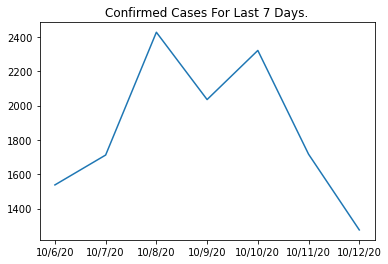

In [8]:
#plot the confirmed cases
confirmed_last7.plot(title="Confirmed Cases For Last 7 Days.")

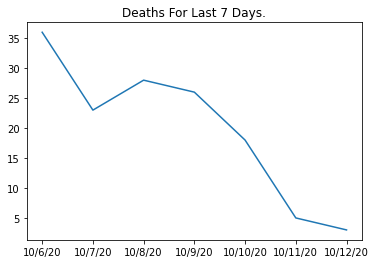

In [9]:
#plot the deaths
deaths_last7.plot(title="Deaths For Last 7 Days.")

## Trends For Confirmed Cases For North Carolina
- ## The confirmed peaked on the 17th (Thursday), however they are trending downwards.

## Trends For deaths For North Carolin
- ## The deaths peaked on the 15th (Tuesday), however they are trending downwards.